Využití Fourierovy transfromace a další typy transfromací 
- **Spektrum signálu z Fourierovy transformace**
- **Okénková Fourierova transfromace**
- **Kepstrální analýza**
- Waveletová transfromace 


- klasická diskrétní fourierova transformace vytvoří **frekvenční spektrum** signálu 
$$s(k) = \sum_{n=0}^{N-1} s(t) e^{-i\frac{2\pi}{N}kn} $$
- **Rozložení energie spektra** $E_s$ pomocí Fourierovy (spojité) transformace 
  $$\int_{-\infty}^{\infty} \left| s(t) \right|^2 {\rm d}t \rightarrow \int_{-\infty}^{\infty} \left| s(k) \right|^2 {\rm d}k$$
- Rozložení energie spektra $E_s$ pomocí Fourierovy (diskrétní) transformace 
  $$\sum_{n=1}^N \left| s(n)\right|^2 \rightarrow \sum_{k=0}^{N-1} \left| s(k)\right|^2 = \sum_{k=0}^{N-1} \left| \sum_{n=0}^{N-1} s(t) e^{-i\frac{2\pi}{N}kn}\right|^2$$
- tedy energie dané frekvence ve spektru $E_s(f)$ je
  $$E_s(k) = \left| s(k)\right|^2 = \left| \sum_{n=0}^{N-1} s(t) e^{-i\frac{2\pi}{N}kn}\right|^2$$
  
**Výkonové spektrum** popisuje, jak je energie distribuována přes jednotlivé frekvence 
- výkon obsahuje element času $P = \frac{E}{t}$  nebo $P = \frac{E}{T}$
Potom je výkonnové spektrum pro diskrétní reprezentaci signálu počítáno jako 
$$P_s(k) = \lim_{N\rightarrow \infty} \frac{(\Delta t)^2}{T} \left| s_\omega(k)\right|^2 = \lim_{T\rightarrow \infty} \frac{(\Delta t)^2}{T} \left| \sum_{n=-N}^{N} s(t) e^{-i\frac{2\pi}{N}kn \Delta t}\right|^2$$
- kde $s_\omega(k)$ je spektrum signálu omezeného na časový interval $\Delta t$ a $T = (2N+1)\Delta t$

---

Okénková Furierova transformace
 - aj. STFT - [Short-time Fourier Transform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html)
 - použití pro lepší lokalizaci událostí v signálech 

**Využití STFT při lokalizaci R vrcholu v EKG signálu**

C:\Users\zposel\AppData\Local\Temp\ipykernel_17204\4159708348.py:8: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  EKG =  electrocardiogram();


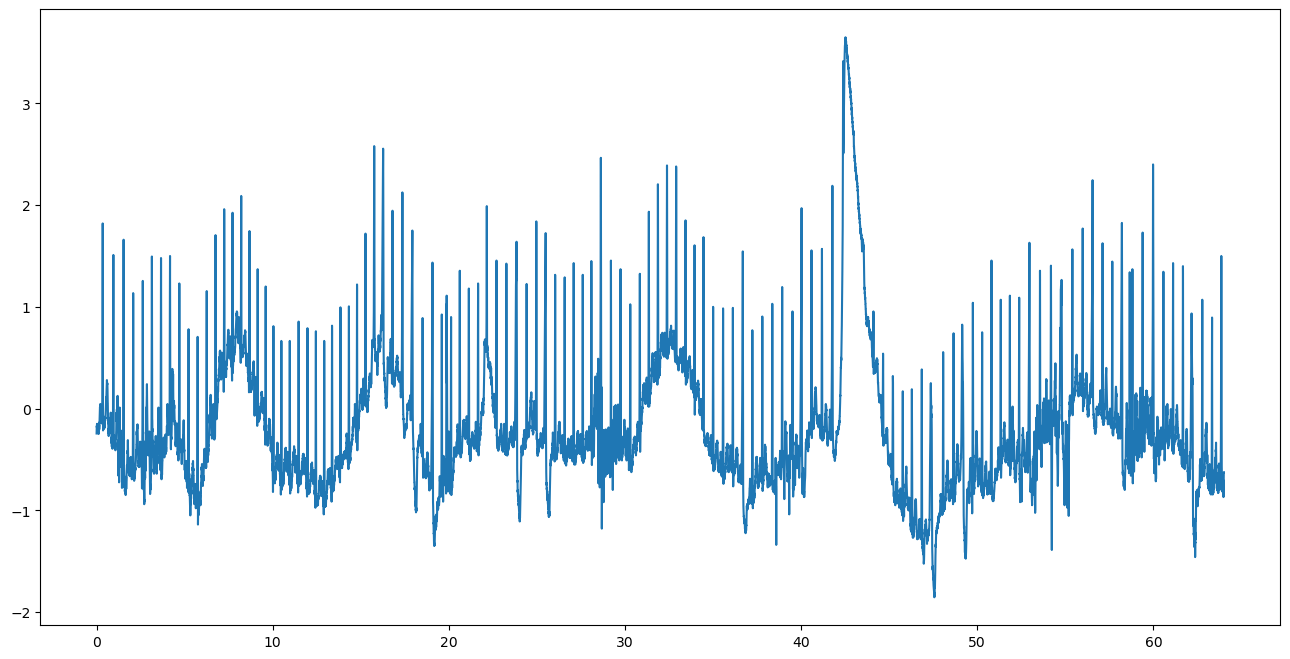

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
import scipy as sp
from scipy.misc import electrocardiogram

#generate ECG signal at 360Hz sampling rate 5 min long
EKG =  electrocardiogram();

Fs = 360; #Hz
T = 1/Fs;

n_length=6*3840;
#n_length = int(np.floor(10/T)) #take 10 s long interval
tvec = np.arange(n_length)*T;
Signal = EKG[0:n_length];
plt.figure(figsize=(16, 8))
plt.plot(tvec,Signal);



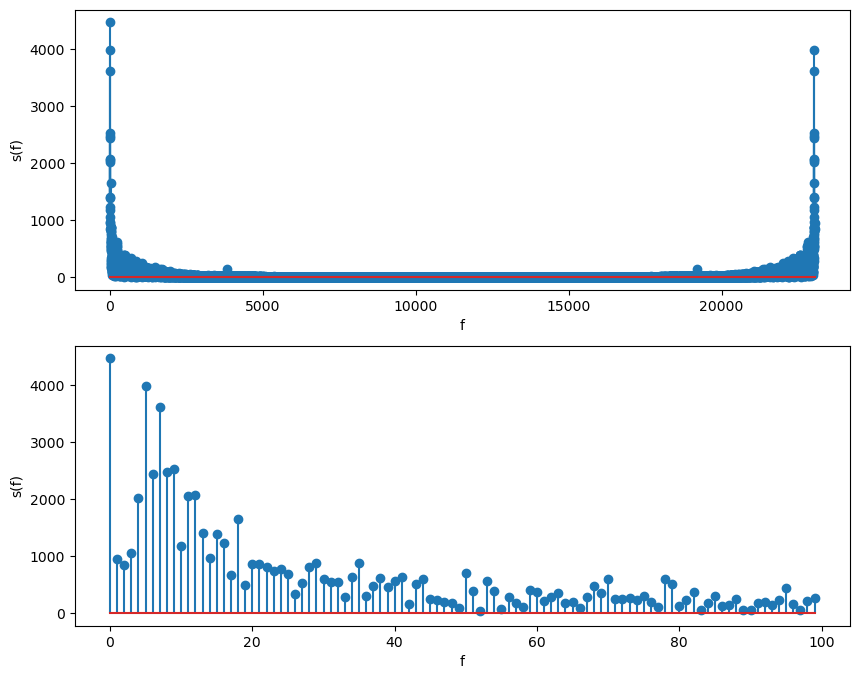

In [75]:
#perform FT and plot spectrum

SigFFT = np.abs(np.fft.fft(Signal))

plt.subplot(2,1,1)
plt.stem(np.arange(tvec.size),SigFFT);
plt.xlabel('f');
plt.ylabel('s(f)');

plt.subplot(2,1,2)
nsigs = 100
plt.stem(np.arange(nsigs),SigFFT[0:nsigs]);
plt.xlabel('f');
plt.ylabel('s(f)');


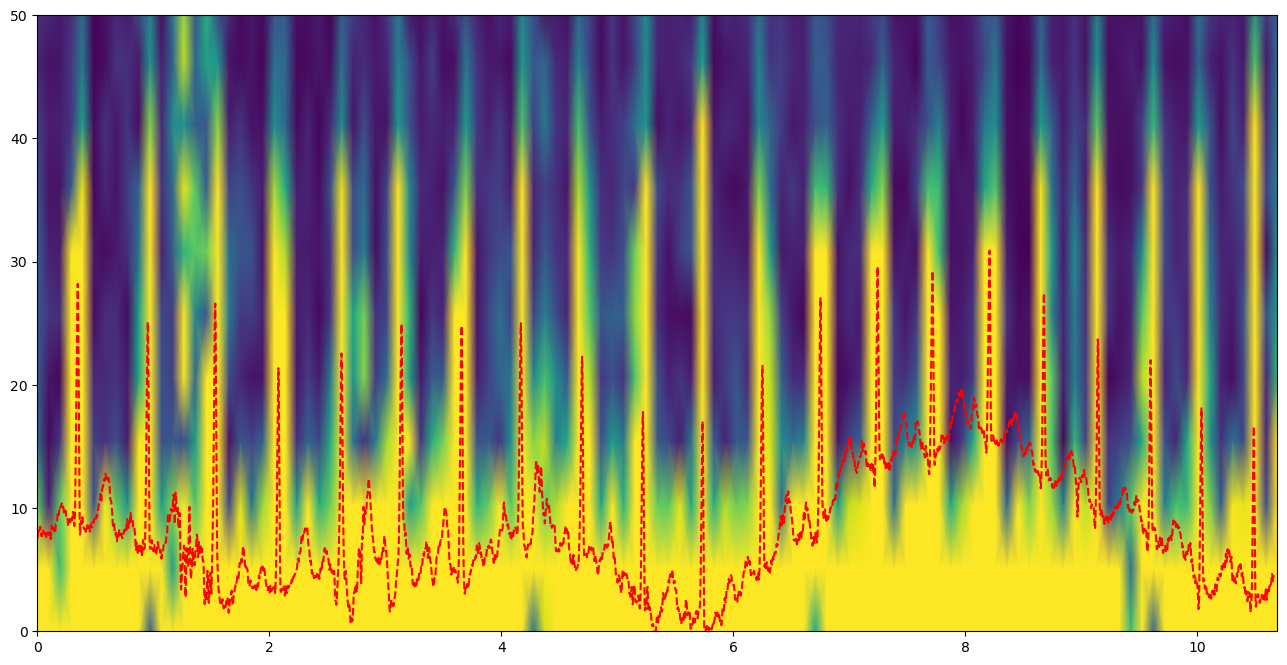

In [ ]:
#perform STFT analysis with variable window width
from scipy import signal

#reffer to stft variables
#f - array of sampling freqs
#t- timestamps of segments
# Zxx - stft of signal x
f,t,Zxx = sp.signal.stft(Signal, Fs,nperseg=70)

plt.figure(figsize=(16, 8))
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.05, shading='gouraud')
plt.plot(tvec[0:n_length],Signal*10+10,'r--')
plt.ylim((0,50))
plt.show()



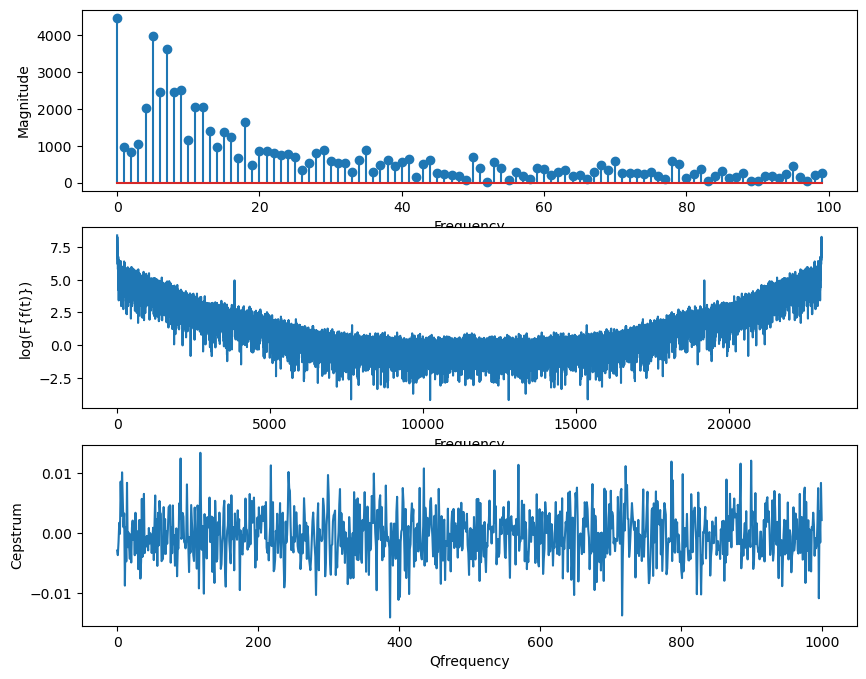

In [79]:
#perform FFT of the Speech and obtain power
#FFtsignal = np.abs(np.fft.fft(Signal))
FFtsignal = np.abs(np.fft.fft(Signal))
#perform log of spectra

logSignal = np.log(FFtsignal)
#perform inverse FFT on log signal
FFTbackSignal=np.fft.ifft(logSignal)

plt.subplot(3,1,1)
#plt.plot(FFtsignal[0:100])
plt.stem(FFtsignal[0:100])
plt.xlabel('Frequency');
plt.ylabel('Magnitude');
plt.subplot(3,1,2)
plt.plot(logSignal)
plt.xlabel('Frequency');
plt.ylabel('log(F{f(t)})');
plt.subplot(3,1,3)
plt.plot(FFTbackSignal[1000:2000])
plt.xlabel('Qfrequency');
plt.ylabel('Cepstrum');




**Kepstrální analýza**
  - model vytváření mluveného slova
  - analýza pomocí Fourierovy transformace (přímá, zpětná)
  - kepstrum $C_p$ je tzv. spektrum spektra
$$ C_p = \left| F^{-1} \left\{ \log{\left( \left| F\{ f(t) \}\right|^2    \right)}\right\}\right|^2$$
po zjednodušení 
$$ C_p = \left| F^{-1} \left\{ 2\log{|F(f(t))|}\right\}\right|^2$$

kde $F\{(f(t)\}$ je Fourierova transformace signálu $f(t)$.




Model vytváření mluveného slova
- [pyttsx3](https://pypi.org/project/pyttsx3/) modul 
- [wave](https://docs.python.org/3/library/wave.html) modul 


In [11]:
import pyttsx3
import wave

22050
38901
1
1.7642176870748298


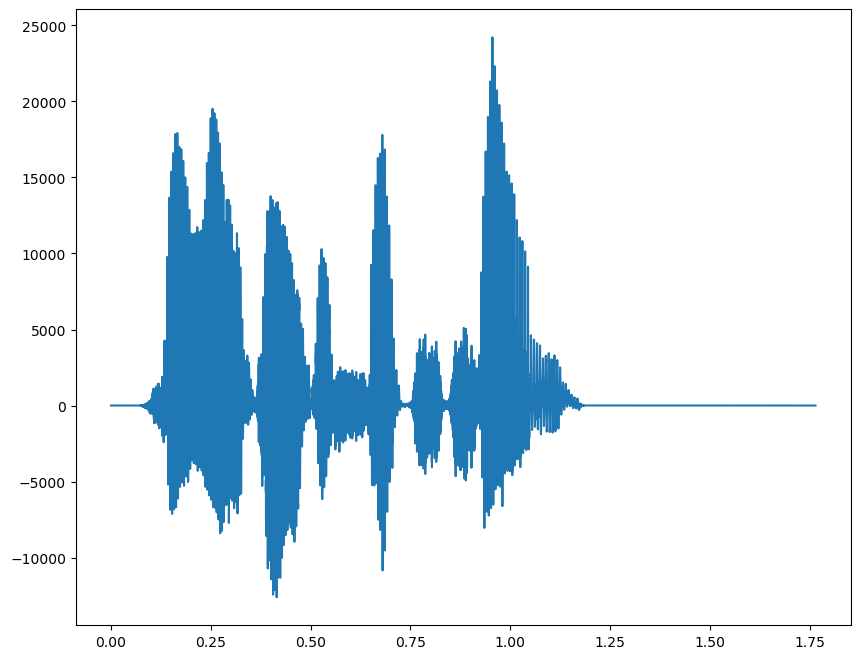

In [51]:
SynthVoice = pyttsx3.init();
SynthVoice.save_to_file("Hello do the cepstrum", 'TestFile.wav')
SynthVoice.runAndWait()
SynthVoice.stop()

Signal_object = wave.open('TestFile.wav', 'rb')

#get basic params opf teh signal
Fs = Signal_object.getframerate()
n_length = Signal_object.getnframes()
n_channels = Signal_object.getnchannels()

print(Fs)
print(n_length)
print(n_channels)
print(n_length/Fs)

#load signal into numpy array
Signalobj = Signal_object.readframes(n_length);
Signal = np.frombuffer(Signalobj, dtype=np.int16)

Ts = 1/Fs;

tvec = np.arange(n_length)*Ts
plt.plot(tvec,Signal);

#close the fid
Signal_object.close()

1436
0
26452
0


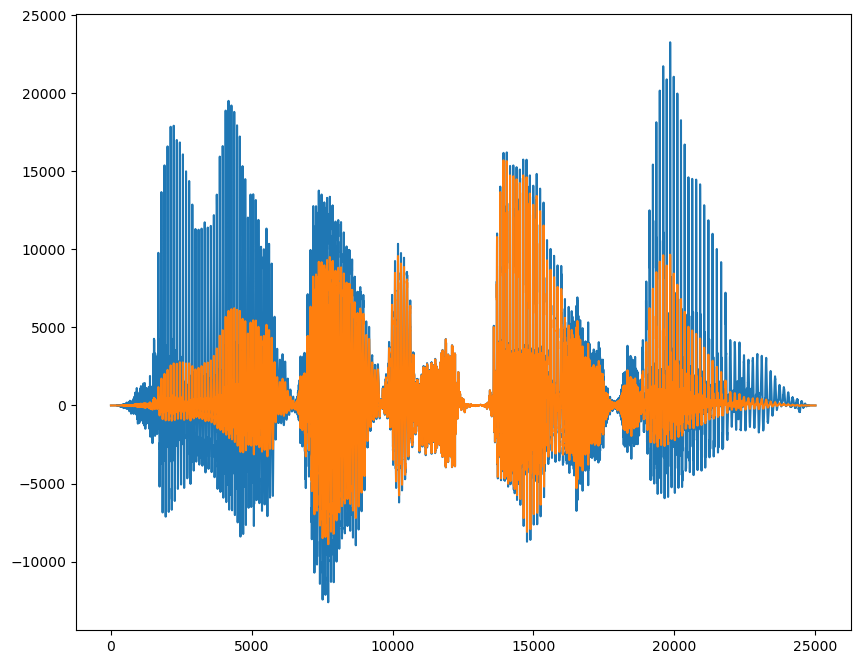

In [23]:
# find first an last non zero element
ids = np.array(np.nonzero(Signal))
id1 = ids[0,0]
print(id1)
print(Signal[id1-1])
#revert signal and calculate the last 
SignalFlip = np.flip(Signal)
ids = np.array(np.nonzero(SignalFlip))
id2 = Signal.size - ids[0,0]-1
print(id2)
print(Signal[id2+1])
SignalCut = Signal[id1:id2]
SignalCut2 = np.hamming(SignalCut.size)*SignalCut
plt.plot(SignalCut)
plt.plot(SignalCut2)

#apply hamming filter

SignalCut2 = np.hamming(SignalCut.size)*SignalCut

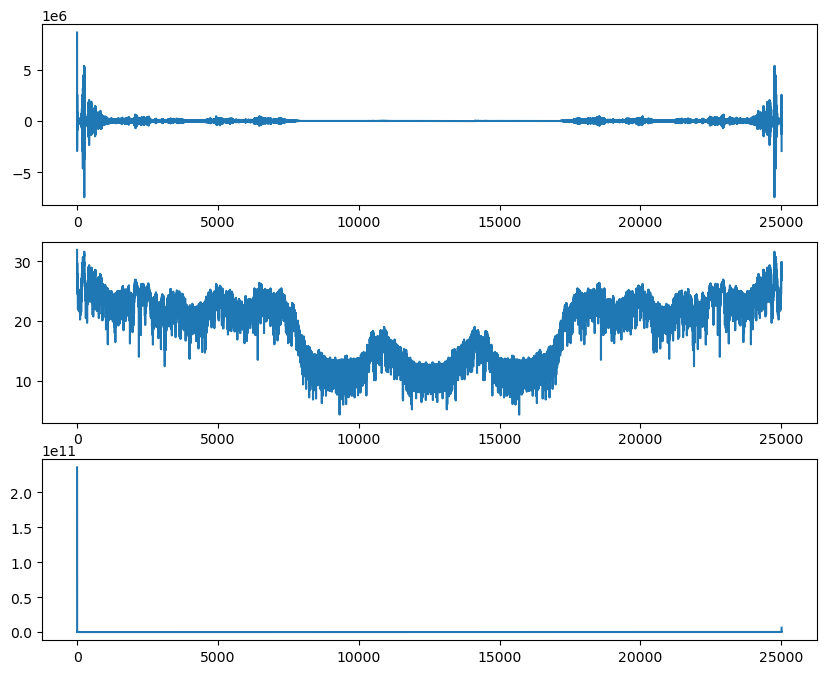

In [52]:
plt.rcParams["figure.figsize"] = (10,8)

#perform FFT of the Speech and obtain power
#FFtsignal = np.abs(np.fft.fft(Signal))
FFtsignal = np.fft.fft(SignalCut2)
#perform log of spectra

#logSignal = np.log(np.abs(FFtsignal))
logSignal = np.log(np.abs(FFtsignal)**2)
#perform inverse FFT on log signal
FFTbackSignal=np.abs(np.fft.fft(logSignal))**2


plt.subplot(3,1,1)
plt.plot(FFtsignal)
plt.subplot(3,1,2)
plt.plot(logSignal)
plt.subplot(3,1,3)
plt.plot(FFTbackSignal)



In [54]:
#source codes from http://flothesof.github.io/cepstrum-pitch-tracking.html

def make_sine_wave(f0, sampling_frequency, frame_size, phase=0):
    t = np.arange(frame_size) / sampling_frequency
    return np.sin(2 * np.pi * f0 * t + phase)

def make_harmonic_wave(f0, sampling_frequency, frame_size, n_harmonics=10):
    waveform = np.zeros((frame_size,), dtype=float)
    for f in [f0 * i for i in range(1, n_harmonics + 1)]:
        waveform += f0 / f * make_sine_wave(f, sampling_frequency, frame_size, phase=f)
    return waveform

Text(0.5, 1.0, 'time signal')

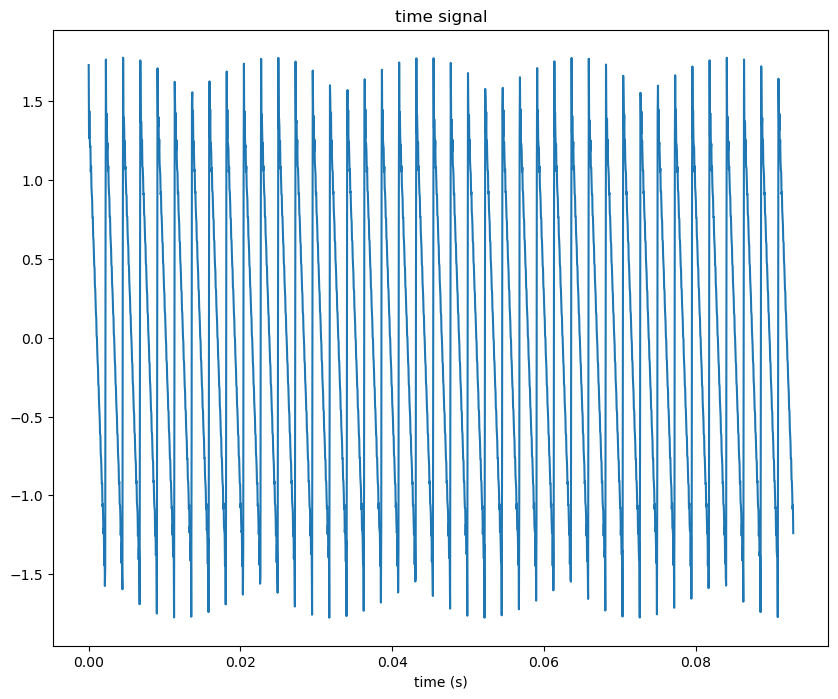

In [59]:
sample_freq = 22050 # Hz
frame_size = 2048
time_vector = np.arange(frame_size) / sample_freq
#signal = make_sine_wave(440, sample_freq, frame_size)
signal = make_harmonic_wave(440, sample_freq, frame_size, n_harmonics=20)

fig, ax = plt.subplots()
ax.plot(time_vector, signal)
ax.set_xlabel('time (s)')
ax.set_title('time signal')

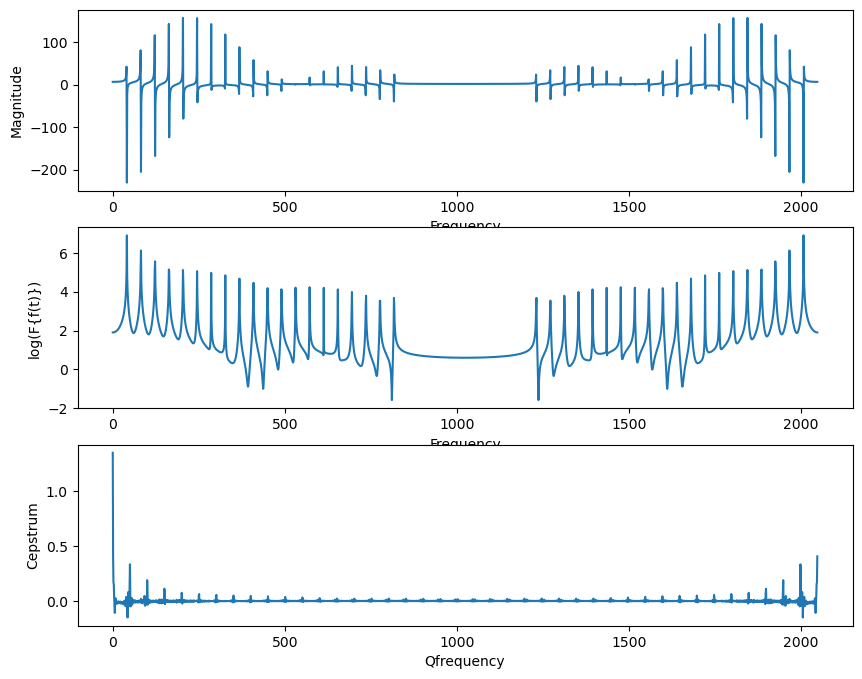

In [60]:
plt.rcParams["figure.figsize"] = (10,8)

#perform FFT of the Speech and obtain power
#FFtsignal = np.abs(np.fft.fft(Signal))
FFtsignal = np.fft.fft(signal)
#perform log of spectra

logSignal = np.log(np.abs(FFtsignal))
#perform inverse FFT on log signal
FFTbackSignal=np.fft.ifft(logSignal)

plt.subplot(3,1,1)
plt.plot(FFtsignal)
plt.xlabel('Frequency');
plt.ylabel('Magnitude');
plt.subplot(3,1,2)
plt.plot(logSignal)
plt.xlabel('Frequency');
plt.ylabel('log(F{f(t)})');
plt.subplot(3,1,3)
plt.plot(FFTbackSignal)
plt.xlabel('Qfrequency');
plt.ylabel('Cepstrum');
